In [2]:
#Andrea Vargas Gutierrez 000132192


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing , linear_model
from sklearn.linear_model import LinearRegression
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv("C:\Users\Andrea1\Desktop\project1\environment1/reglin.csv")

In [109]:
df.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [110]:
# index for selecting data 0.75 is the percentage in training
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])
# Separate both train and test as well as the response variable
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[[df.columns[-1]]])[index==1]
Y_test=np.array(df[[df.columns[-1]]])[index==0]

In [111]:
from sklearn import preprocessing
scaleX=preprocessing.StandardScaler()
scaleY=preprocessing.StandardScaler()
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
scaleY.fit(Y_train)
Y_train=scaleY.transform(Y_train)

In [112]:
def ajustarWi(Xmat,Yvec,ajuste):
    Wi=np.ones(len(Xmat[0,:]))
    Error=0
    Errorvec=list()
    Waux=Wi[:]
    W1=list()
    W0=1

    for j in range(0,len(Yvec)-1):
        Vj=np.dot(Xmat[j,:],Wi)
        Error=Yvec[j]-Vj
        Wiaux=Wi[:]
        Errorvec.append(Error)
        W1.append(Wi[0])
        
        for i in range(0,len(Xmat[0])):
            Wi[i] = Waux[i]+Error*ajuste*Xmat[j,i]
            W0 = W0 + ajuste * Error
        
        
    return  W0, Wi, Errorvec
    
    
    

In [113]:
X_test=scaleX.transform(X_test)
Y_test=scaleY.transform(Y_test)

In [114]:

W0=ajustarWi(X_train,Y_train,.1)[0]
W1=ajustarWi(X_train,Y_train,.1)[1]



In [115]:
W0_01=ajustarWi(X_train,Y_train,.1)[0]
W1_01=ajustarWi(X_train,Y_train,.1)[1]

W0_05=ajustarWi(X_train,Y_train,.05)[0]
W1_05=ajustarWi(X_train,Y_train,.05)[1]

W0_1=ajustarWi(X_train,Y_train,.05)[0]
W1_1=ajustarWi(X_train,Y_train,.05)[1]


In [116]:
W0_01

array([ 0.8482279])

In [117]:
W1_01

array([ 0.97709874])

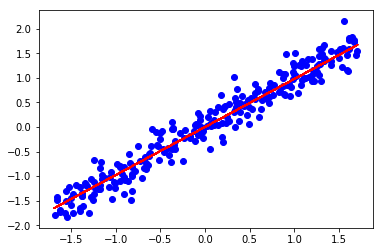

In [118]:
plt.scatter(X_test, Y_test,color='b')
plt.plot(X_train,W1_01*X_train,color='r')

In [119]:
W0_05

array([ 0.95131797])

In [120]:
W1_05

array([ 0.98405786])

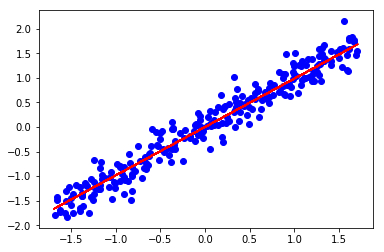

In [121]:
plt.scatter(X_test, Y_test,color='b')
plt.plot(X_train,W1_05*X_train,color='r')

In [122]:
W0_1

array([ 0.95131797])

In [123]:
W1_1

array([ 0.98405786])

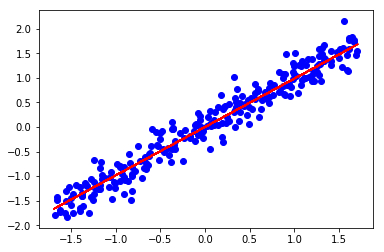

In [124]:
plt.scatter(X_test, Y_test,color='b')
plt.plot(X_train,W1_1*X_train,color='r')